In [ ]:
!pip install keras-tuner --quiet

In [ ]:
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [4]:
train_data = pd.read_csv("store_sales/train_store_sales.csv")
oil_data = pd.read_csv("store_sales/oil.csv")
stores_data = pd.read_csv("store_sales/stores.csv")
holi_event_data = pd.read_csv("store_sales/holidays_events.csv")

In [5]:
train_data.head(), train_data.tail()

(   id        date  store_nbr      family  sales  onpromotion
 0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
 1   1  2013-01-01          1   BABY CARE    0.0            0
 2   2  2013-01-01          1      BEAUTY    0.0            0
 3   3  2013-01-01          1   BEVERAGES    0.0            0
 4   4  2013-01-01          1       BOOKS    0.0            0,
               id        date  store_nbr                      family     sales  \
 3000883  3000883  2017-08-15          9                     POULTRY   438.133   
 3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
 3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
 3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
 3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   
 
          onpromotion  
 3000883            0  
 3000884            1  
 3000885          148  
 3000886            8  
 3000887     

In [6]:
holi_event_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [7]:
train_data.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [8]:
train_data= train_data.set_index(train_data['date'])
train_data.index.names = ['date_time']
train_data.index = pd.to_datetime(train_data.index)
train_data.head(), train_data.shape

(            id        date  store_nbr      family  sales  onpromotion
 date_time                                                            
 2013-01-01   0  2013-01-01          1  AUTOMOTIVE    0.0            0
 2013-01-01   1  2013-01-01          1   BABY CARE    0.0            0
 2013-01-01   2  2013-01-01          1      BEAUTY    0.0            0
 2013-01-01   3  2013-01-01          1   BEVERAGES    0.0            0
 2013-01-01   4  2013-01-01          1       BOOKS    0.0            0,
 (3000888, 6))

In [9]:
def split_date_time(df):
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['weekday'] = df.index.weekday
    df['year'] = df.index.year
    return df

In [10]:
train_data = split_date_time(train_data)
train_data['is_weekend'] = train_data['weekday'].apply(lambda x: 1 if x>4 else 0)
train_data.head()

,id,date,store_nbr,family,sales,onpromotion,month,day,weekday,year,is_weekend
date_time,,,,,,,,,,,
2013-01-01,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,1,1,2013,0
2013-01-01,1,2013-01-01,1,BABY CARE,0.0,0,1,1,1,2013,0
2013-01-01,2,2013-01-01,1,BEAUTY,0.0,0,1,1,1,2013,0
2013-01-01,3,2013-01-01,1,BEVERAGES,0.0,0,1,1,1,2013,0
2013-01-01,4,2013-01-01,1,BOOKS,0.0,0,1,1,1,2013,0


In [11]:
merged_df = pd.merge(train_data,oil_data,on="date",how="left").merge(right=stores_data,on="store_nbr",how="left").merge(right=holi_event_data,on="date",how="left")
merged_df.describe()

,id,store_nbr,sales,onpromotion,month,day,weekday,year,is_weekend,dcoilwtico,cluster
count,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,2.099196e+06,3.054348e+06
mean,1.504277e+06,2.750000e+01,3.590209e+02,2.617480e+00,6.222870e+00,1.565694e+01,3.008168e+00,2.014842e+03,2.876313e-01,6.801587e+01,8.481481e+00
std,8.662610e+05,1.558579e+01,1.107286e+03,1.225494e+01,3.374251e+00,8.801398e+00,2.001442e+00,1.345607e+00,4.526584e-01,2.569134e+01,4.649735e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.013000e+03,0.000000e+00,2.619000e+01,1.000000e+00
25%,7.546768e+05,1.400000e+01,0.000000e+00,0.000000e+00,3.000000e+00,8.000000e+00,1.000000e+00,2.014000e+03,0.000000e+00,4.641000e+01,4.000000e+00
50%,1.507572e+06,2.750000e+01,1.100000e+01,0.000000e+00,6.000000e+00,1.600000e+01,3.000000e+00,2.015000e+03,0.000000e+00,5.343000e+01,8.500000e+00
75%,2.255120e+06,4.100000e+01,1.960110e+02,0.000000e+00,9.000000e+00,2.300000e+01,5.000000e+00,2.016000e+03,1.000000e+00,9.581000e+01,1.300000e+01
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.200000e+01,3.100000e+01,6.000000e+00,2.017000e+03,1.000000e+00,1.106200e+02,1.700000e+01


In [12]:
merged_df.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
month                0
day                  0
weekday              0
year                 0
is_weekend           0
dcoilwtico      955152
city                 0
state                0
type_x               0
cluster              0
type_y         2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dtype: int64

In [13]:
merged_df['dcoilwtico']= merged_df['dcoilwtico'].fillna(0)
merged_df.query('date=="2016-04-16"')

,id,date,store_nbr,family,sales,onpromotion,month,day,weekday,year,...,dcoilwtico,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
2161566,2134836,2016-04-16,1,AUTOMOTIVE,6.000,0,4,16,5,2016,...,0.0,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi,False
2161567,2134837,2016-04-16,1,BABY CARE,0.000,0,4,16,5,2016,...,0.0,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi,False
2161568,2134838,2016-04-16,1,BEAUTY,4.000,0,4,16,5,2016,...,0.0,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi,False
2161569,2134839,2016-04-16,1,BEVERAGES,2073.000,5,4,16,5,2016,...,0.0,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi,False
2161570,2134840,2016-04-16,1,BOOKS,0.000,0,4,16,5,2016,...,0.0,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163343,2136613,2016-04-16,9,POULTRY,668.427,2,4,16,5,2016,...,0.0,Quito,Pichincha,B,6,Event,National,Ecuador,Terremoto Manabi,False
2163344,2136614,2016-04-16,9,PREPARED FOODS,135.720,0,4,16,5,2016,...,0.0,Quito,Pichincha,B,6,Event,National,Ecuador,Terremoto Manabi,False
2163345,2136615,2016-04-16,9,PRODUCE,1496.493,0,4,16,5,2016,...,0.0,Quito,Pichincha,B,6,Event,National,Ecuador,Terremoto Manabi,False
2163346,2136616,2016-04-16,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,4,16,5,2016,...,0.0,Quito,Pichincha,B,6,Event,National,Ecuador,Terremoto Manabi,False


In [14]:
merged_df = merged_df.fillna("No holiday")
merged_df.loc[merged_df.transferred == True,"type_y"] = "No holiday"

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   month        int64  
 7   day          int64  
 8   weekday      int64  
 9   year         int64  
 10  is_weekend   int64  
 11  dcoilwtico   float64
 12  city         object 
 13  state        object 
 14  type_x       object 
 15  cluster      int64  
 16  type_y       object 
 17  locale       object 
 18  locale_name  object 
 19  description  object 
 20  transferred  object 
dtypes: float64(2), int64(9), object(10)
memory usage: 512.7+ MB


In [16]:
merged_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,3054348.0,1.504277e+06,866261.012008,0.0,754676.75,1507571.50,2255120.250,3000887.00
store_nbr,3054348.0,2.750000e+01,15.585787,1.0,14.00,27.50,41.000,54.00
sales,3054348.0,3.590209e+02,1107.285897,0.0,0.00,11.00,196.011,124717.00
onpromotion,3054348.0,2.617480e+00,12.254939,0.0,0.00,0.00,0.000,741.00
month,3054348.0,6.222870e+00,3.374251,1.0,3.00,6.00,9.000,12.00
day,3054348.0,1.565694e+01,8.801398,1.0,8.00,16.00,23.000,31.00
weekday,3054348.0,3.008168e+00,2.001442,0.0,1.00,3.00,5.000,6.00
year,3054348.0,2.014842e+03,1.345607,2013.0,2014.00,2015.00,2016.000,2017.00
is_weekend,3054348.0,2.876313e-01,0.452658,0.0,0.00,0.00,1.000,1.00
dcoilwtico,3054348.0,4.674603e+01,38.051512,0.0,0.00,47.02,91.530,110.62


In [17]:
merged_df.query('type_y=="No holiday"')

,id,date,store_nbr,family,sales,onpromotion,month,day,weekday,year,...,dcoilwtico,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
1782,1782,2013-01-02,1,AUTOMOTIVE,2.000,0,1,2,2,2013,...,93.14,Quito,Pichincha,D,13,No holiday,No holiday,No holiday,No holiday,No holiday
1783,1783,2013-01-02,1,BABY CARE,0.000,0,1,2,2,2013,...,93.14,Quito,Pichincha,D,13,No holiday,No holiday,No holiday,No holiday,No holiday
1784,1784,2013-01-02,1,BEAUTY,2.000,0,1,2,2,2013,...,93.14,Quito,Pichincha,D,13,No holiday,No holiday,No holiday,No holiday,No holiday
1785,1785,2013-01-02,1,BEVERAGES,1091.000,0,1,2,2,2013,...,93.14,Quito,Pichincha,D,13,No holiday,No holiday,No holiday,No holiday,No holiday
1786,1786,2013-01-02,1,BOOKS,0.000,0,1,2,2,2013,...,93.14,Quito,Pichincha,D,13,No holiday,No holiday,No holiday,No holiday,No holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052561,2999101,2017-08-14,9,POULTRY,283.429,0,8,14,0,2017,...,47.59,Quito,Pichincha,B,6,No holiday,No holiday,No holiday,No holiday,No holiday
3052562,2999102,2017-08-14,9,PREPARED FOODS,114.120,0,8,14,0,2017,...,47.59,Quito,Pichincha,B,6,No holiday,No holiday,No holiday,No holiday,No holiday
3052563,2999103,2017-08-14,9,PRODUCE,1348.425,7,8,14,0,2017,...,47.59,Quito,Pichincha,B,6,No holiday,No holiday,No holiday,No holiday,No holiday
3052564,2999104,2017-08-14,9,SCHOOL AND OFFICE SUPPLIES,182.000,11,8,14,0,2017,...,47.59,Quito,Pichincha,B,6,No holiday,No holiday,No holiday,No holiday,No holiday


In [18]:
merged_df.tail()

,id,date,store_nbr,family,sales,onpromotion,month,day,weekday,year,...,dcoilwtico,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,8,15,1,2017,...,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,8,15,1,2017,...,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,8,15,1,2017,...,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,8,15,1,2017,...,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,8,15,1,2017,...,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [19]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(merged_df[["city","state"]])

OrdinalEncoder()

In [20]:
merged_df[["city","state"]] = enc.transform(merged_df[["city","state"]])

In [21]:
merged_df['transferred'] =  merged_df['transferred'].apply(lambda x: 1 if x == True else 0)

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   month        int64  
 7   day          int64  
 8   weekday      int64  
 9   year         int64  
 10  is_weekend   int64  
 11  dcoilwtico   float64
 12  city         float64
 13  state        float64
 14  type_x       object 
 15  cluster      int64  
 16  type_y       object 
 17  locale       object 
 18  locale_name  object 
 19  description  object 
 20  transferred  int64  
dtypes: float64(4), int64(10), object(7)
memory usage: 512.7+ MB


In [151]:
merged_df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
month          0
day            0
weekday        0
year           0
is_weekend     0
dcoilwtico     0
city           0
state          0
type_x         0
cluster        0
type_y         0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

[None]

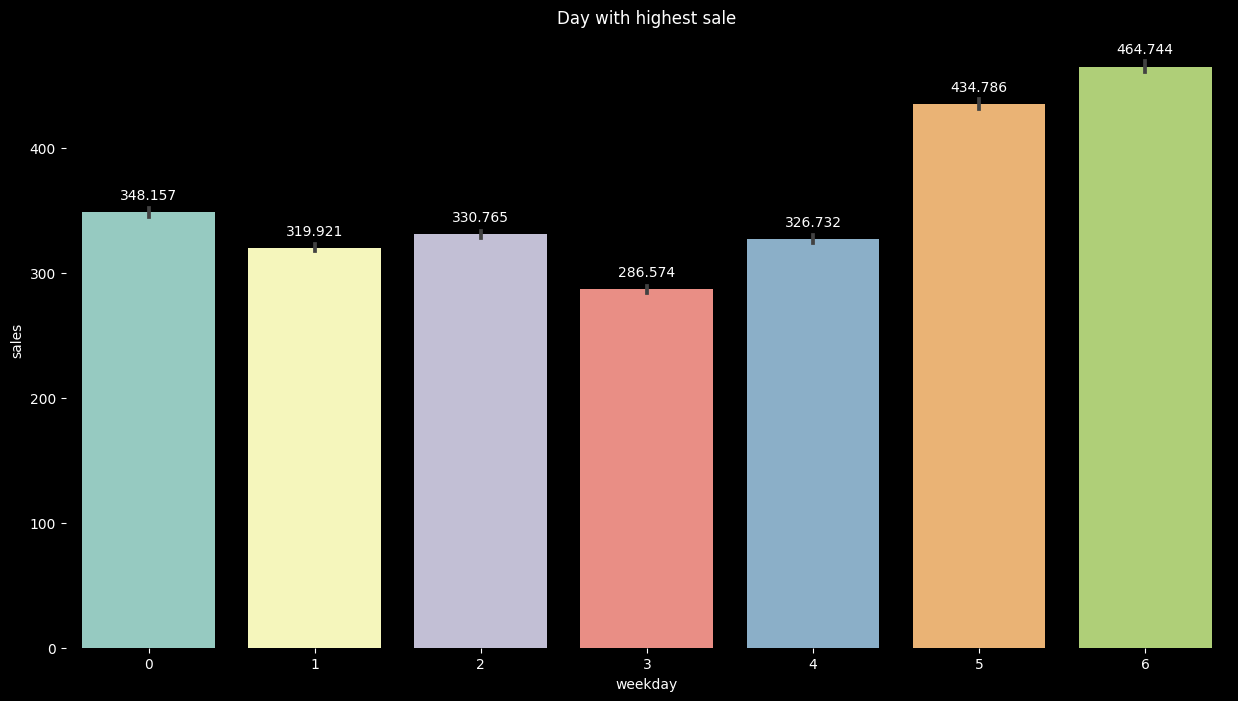

In [78]:
plt.figure(figsize=(15,8))
a = sns.barplot(data=merged_df,x='weekday',y='sales')
plt.bar_label(a.containers[0],padding=7.0)
plt.title("Day with highest sale")
a.set(frame_on=False)

[None]

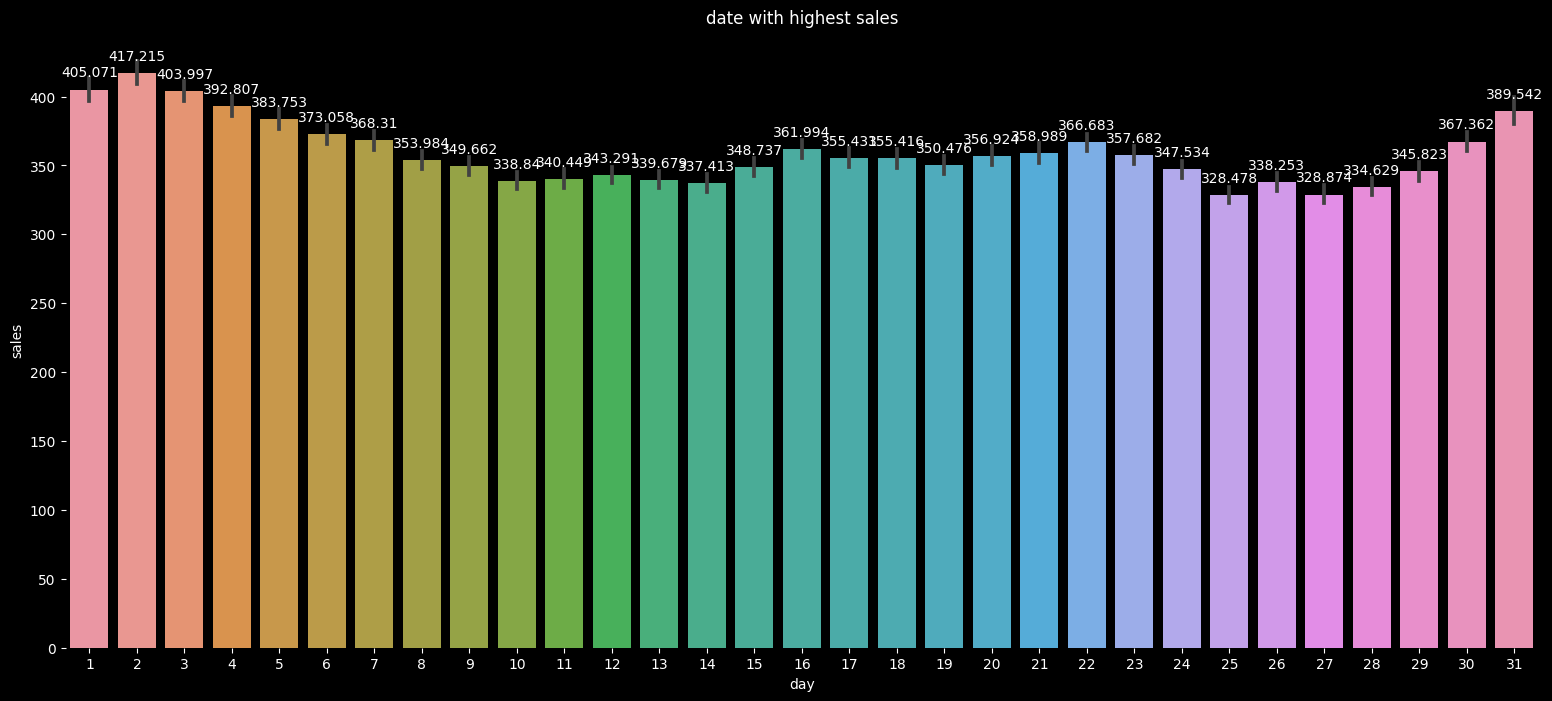

In [23]:
plt.figure(figsize=(19,8))
a = sns.barplot(data=merged_df,x='day',y='sales')
plt.bar_label(a.containers[0],padding=7.0)
plt.title("date with highest sales")
a.set(frame_on=False)

[None]

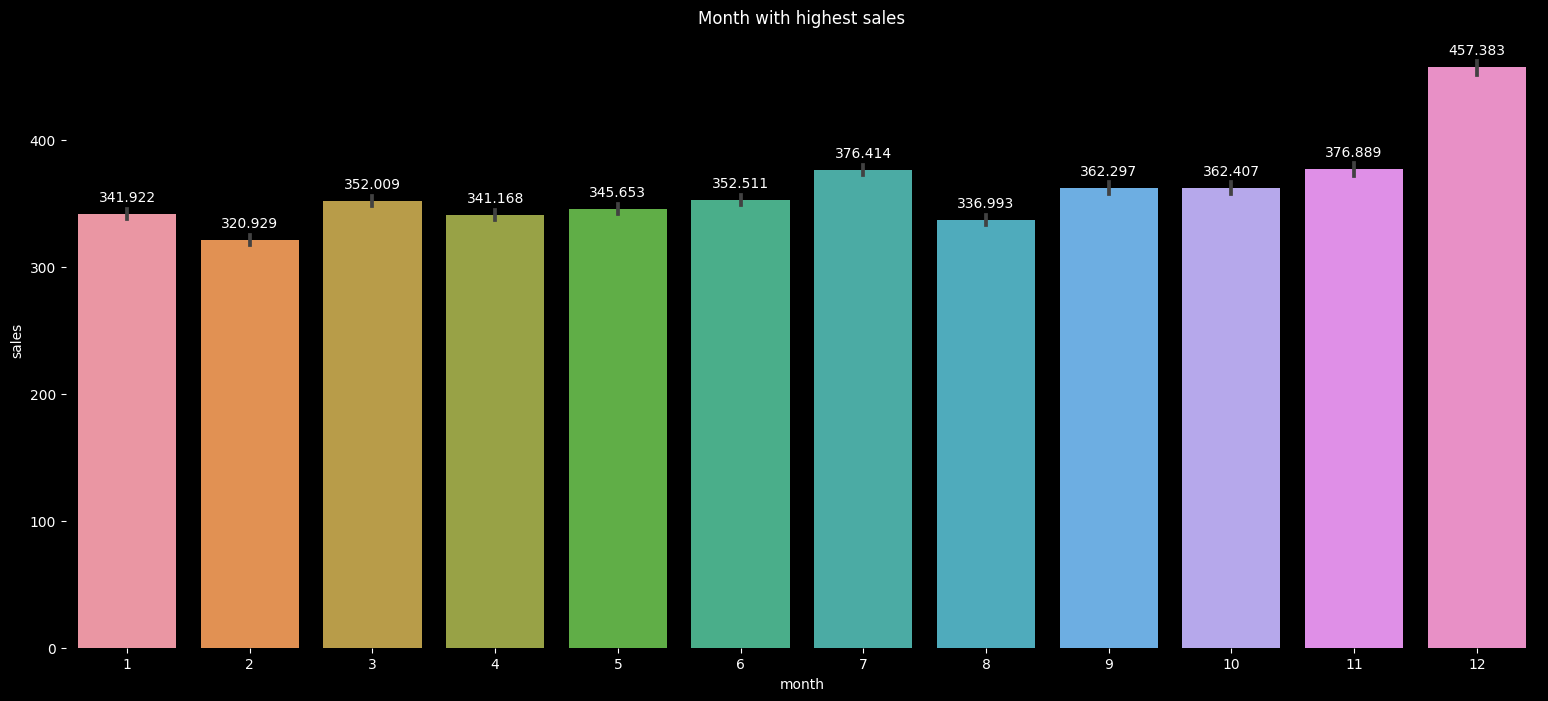

In [24]:
plt.figure(figsize=(19,8))
a = sns.barplot(data=merged_df,x='month',y='sales')
plt.bar_label(a.containers[0],padding=7.0)
plt.title("Month with highest sales")
a.set(frame_on=False)

[None]

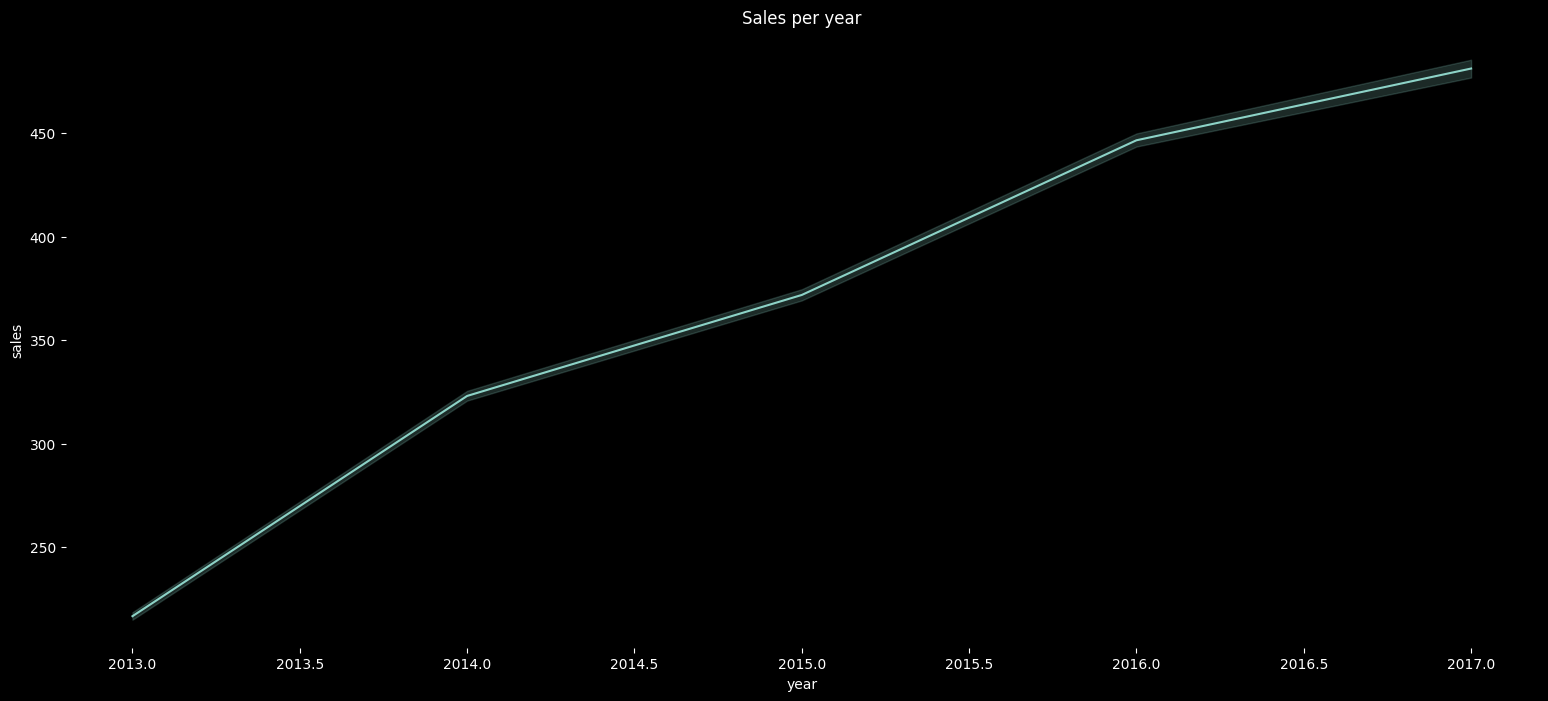

In [25]:
plt.figure(figsize=(19,8))
a = sns.lineplot(data=merged_df,x='year',y='sales')
# plt.bar_label(a.containers[0],padding=7.0)
plt.title("Sales per year")
a.set(frame_on=False)

[None]

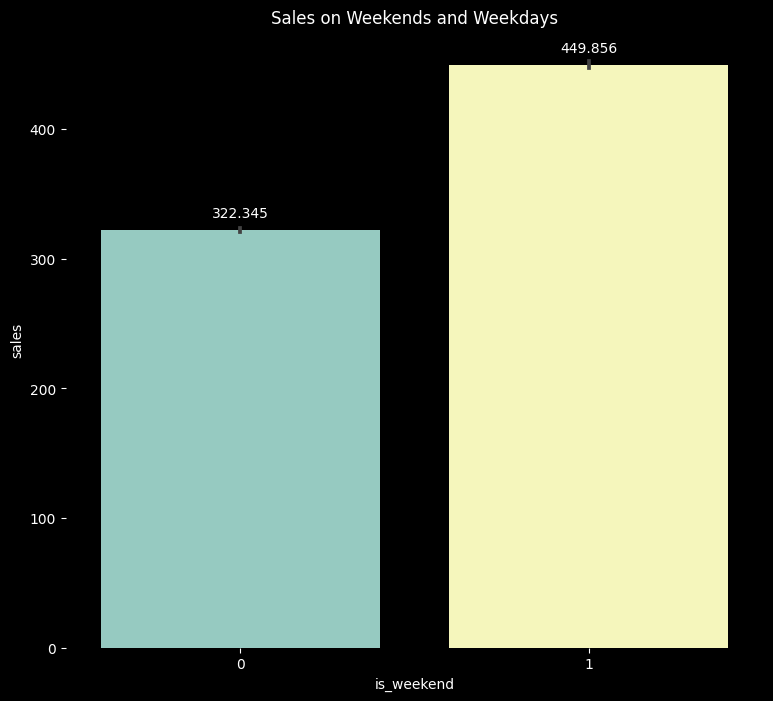

In [79]:
plt.figure(figsize=(9,8))
a = sns.barplot(data=merged_df,x='is_weekend',y='sales')
plt.bar_label(a.containers[0],padding=7.0)
plt.title("Sales on Weekends and Weekdays")
a.set(frame_on=False)

In [23]:
merged_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'month',
       'day', 'weekday', 'year', 'is_weekend', 'dcoilwtico', 'city', 'state',
       'type_x', 'cluster', 'type_y', 'locale', 'locale_name', 'description',
       'transferred'],
      dtype='object')

In [24]:
df_corr = merged_df[['store_nbr','sales','onpromotion','dcoilwtico','city','state','cluster','transferred','month','day','weekday','year','is_weekend']].corr('pearson')

[Text(0.5, 0, 'store_nbr'),
 Text(1.5, 0, 'sales'),
 Text(2.5, 0, 'onpromotion'),
 Text(3.5, 0, 'dcoilwtico'),
 Text(4.5, 0, 'city'),
 Text(5.5, 0, 'state'),
 Text(6.5, 0, 'cluster'),
 Text(7.5, 0, 'transferred'),
 Text(8.5, 0, 'month'),
 Text(9.5, 0, 'day'),
 Text(10.5, 0, 'weekday'),
 Text(11.5, 0, 'year'),
 Text(12.5, 0, 'is_weekend')]

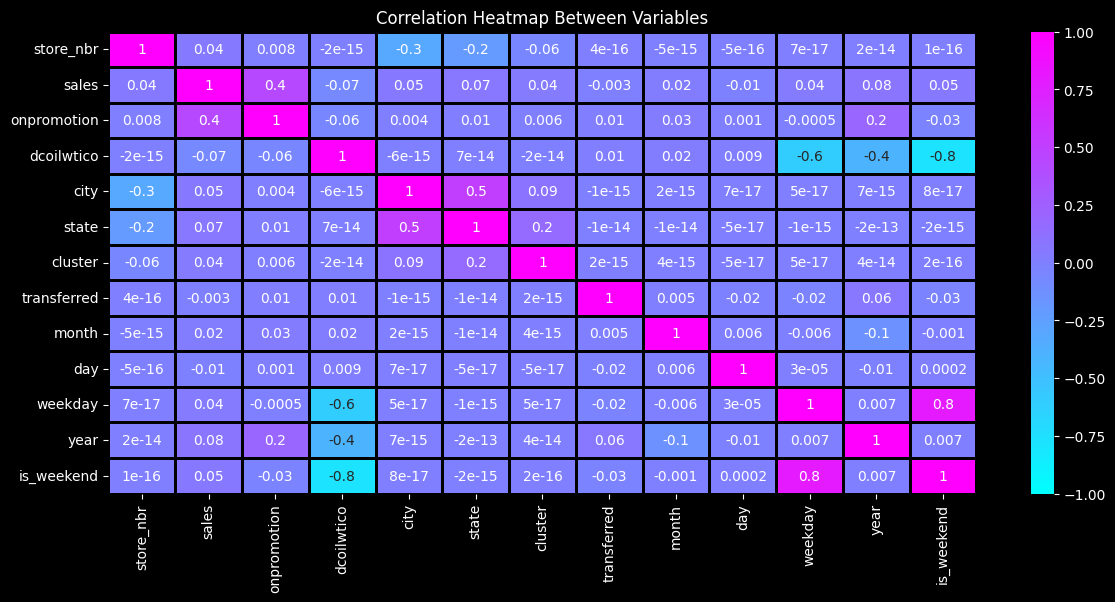

In [25]:
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(df_corr, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="cool", linewidths=1, linecolor="black")
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [137]:
columns = ['onpromotion','weekday','dcoilwtico','day','is_weekend','month','store_nbr',"year","sales"]

train_ready = merged_df[columns].copy()

#remove sales column
columns.remove('sales')
train_ready

,onpromotion,weekday,dcoilwtico,day,is_weekend,month,store_nbr,year,sales
0,0,1,0.00,1,0,1,1,2013,0.000
1,0,1,0.00,1,0,1,1,2013,0.000
2,0,1,0.00,1,0,1,1,2013,0.000
3,0,1,0.00,1,0,1,1,2013,0.000
4,0,1,0.00,1,0,1,1,2013,0.000
...,...,...,...,...,...,...,...,...,...
3054343,0,1,47.57,15,0,8,9,2017,438.133
3054344,1,1,47.57,15,0,8,9,2017,154.553
3054345,148,1,47.57,15,0,8,9,2017,2419.729
3054346,8,1,47.57,15,0,8,9,2017,121.000


In [106]:
train_ready = train_ready[train_ready['sales'] > train_ready['sales'].quantile(0.1)]
train_ready.shape

(668287, 9)

In [140]:
train_ready = train_ready[train_ready['sales'] < train_ready['sales'].quantile(0.75)]
train_ready.shape

(2290760, 9)

In [138]:
train_ready['sales'].describe()

count    3.054348e+06
mean     3.590209e+02
std      1.107286e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.960110e+02
max      1.247170e+05
Name: sales, dtype: float64

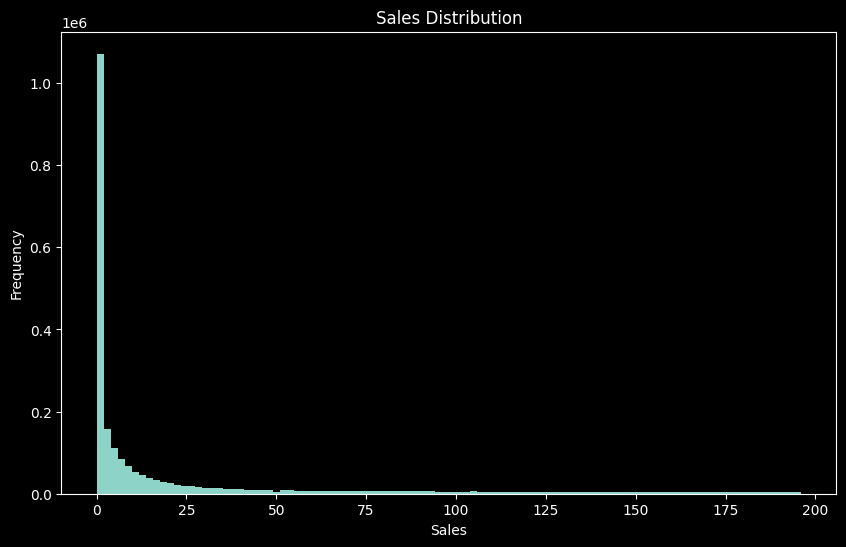

In [141]:
#histogram sales
plt.figure(figsize=(10,6))
plt.hist(train_ready['sales'],bins=100)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


In [142]:
import tensorflow as tf
#optimizador
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Ftrl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

# Seleccionar características y etiquetas
X = train_ready[columns].astype(float)
y = train_ready['sales'].astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Escalar los datos
scaler_X =  MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

#scaler_Y =  MinMaxScaler()
y_train_scaled = y_train.values.reshape(-1, 1)
y_test_scaled = y_test.values.reshape(-1, 1)
#y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1, 1))
#y_test_scaled = scaler_Y.transform(y_test.values.reshape(-1, 1))


# cluster analizis

In [33]:
from sklearn.cluster import KMeans
from tensorflow.keras.layers import Input, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
n_splits =  11

In [34]:

n_splits = 3

# Aplicar KMeans para dividir los datos en 6 clusters
kmeans = KMeans(n_clusters=n_splits, random_state=0).fit(test[columns])
test['cluster'] = kmeans.labels_
print(test['cluster'].value_counts())
# Agregar la columna cluster al dataframe
X_train['cluster'] = kmeans.predict(X_train[columns])
data = X_train['cluster'].value_counts()
print(data.sum())
# Convertir el diccionario a una serie de pandas para un manejo más fácil

series = pd.Series(data)
# Cálculo de la varianza
variance = series.var()
print("Varianza:", variance)

NameError: name 'test' is not defined

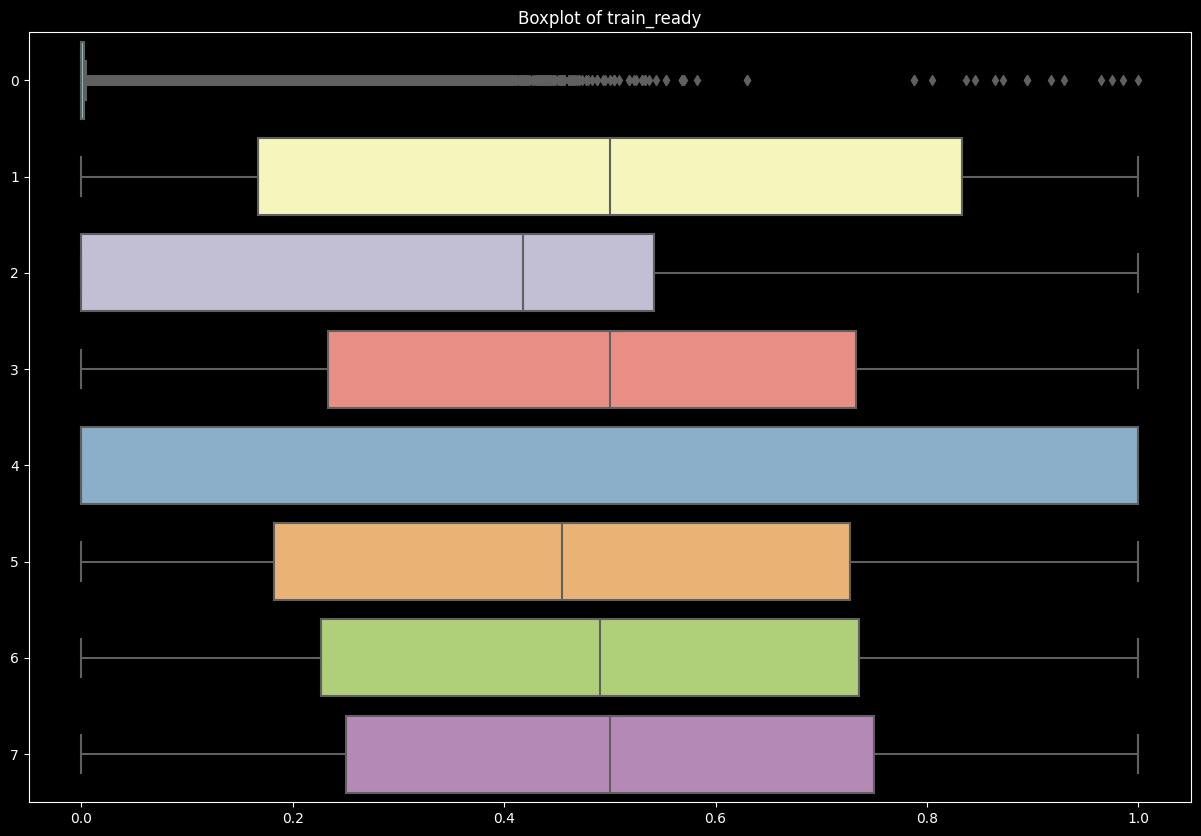

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(data=X_train_scaled,orient="h")
plt.title("Boxplot of train_ready")
plt.show()

In [57]:
X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape

((2443478, 8), (610870, 8), (2443478, 1), (610870, 1))

In [32]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Train

In [110]:
import numpy as np

porcen = 0.15
id_rand = np.random.randint(0, X_train_scaled.shape[0], size=int(X_train_scaled.shape[0]*porcen))
X_train_scaled_reduce = X_train_scaled[id_rand]
y_train_scaled_reduce = y_train_scaled[id_rand]



In [143]:
# Crear el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

# Compilar el modelo loss RMSLE y optimizador Adam
#lr = 0.01
model.compile(optimizer= Adam(learning_rate=0.003), loss='mean_squared_logarithmic_error', metrics=['mse'])

# stop if val_accuracy not improve and take the best model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)

# Entrenar el modelo
model.fit(X_train_scaled_reduce, y_train_scaled_reduce, epochs=100, batch_size=2, validation_data=(X_test_scaled, y_test_scaled), callbacks=[early_stopping])


Epoch 1/100
13366/13366 [==============================] - 346s 26ms/step - loss: 0.6377 - mse: 3016.5051 - val_loss: 8.9806 - val_mse: 3244.8333
Epoch 2/100
13366/13366 [==============================] - 347s 26ms/step - loss: 0.5563 - mse: 2831.3364 - val_loss: 8.4283 - val_mse: 2835.9099
Epoch 3/100
13366/13366 [==============================] - 346s 26ms/step - loss: 0.5543 - mse: 2819.9114 - val_loss: 8.7652 - val_mse: 3069.4775
Epoch 4/100
13366/13366 [==============================] - 358s 27ms/step - loss: 0.5552 - mse: 2825.3093 - val_loss: 9.5042 - val_mse: 3850.7410
Epoch 5/100
13366/13366 [==============================] - 346s 26ms/step - loss: 0.5558 - mse: 2834.2253 - val_loss: 8.8705 - val_mse: 3203.6443


In [144]:
#get best model val_accuracy
best_val_accuracy = max(model.history.history['val_loss'])
print(f"La mejor val_loss del modelo fue: {best_val_accuracy}")

La mejor val_loss del modelo fue: 9.504156112670898


# ML models

In [37]:
from sklearn.metrics import mean_squared_log_error
from sklearn import svm

X = X_train_scaled_reduce
y = y_train_scaled_reduce
regr = svm.SVR()
regr.fit(X, y)


y_pred = regr.predict(X_test_scaled)
y_pred = y_pred.reshape(-1,1)
y_pred = scaler_Y.inverse_transform(y_pred)
y_test = scaler_Y.inverse_transform(y_test_scaled)

rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE: {rmsle}")

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Train Force Variables

In [37]:
columns

['onpromotion',
 'store_nbr',
 'weekday',
 'year',
 'month',
 'day',
 'dcoilwtico',
 'is_weekend']

In [85]:
import pandas as pd
from itertools import combinations

columns =  train_ready.columns
# Genera todas las combinaciones posibles de las columnas
from itertools import combinations

# Tus columnas

# Genera todas las combinaciones posibles de las columnas para grupos de 1, 2, 3 y 4
all_combinations = []
for r in range(4, 6):  # Ahora solo va hasta 4
    all_combinations.extend(combinations(columns, r))


len(all_combinations),all_combinations

(252,
 [('onpromotion', 'weekday', 'dcoilwtico', 'day'),
  ('onpromotion', 'weekday', 'dcoilwtico', 'is_weekend'),
  ('onpromotion', 'weekday', 'dcoilwtico', 'month'),
  ('onpromotion', 'weekday', 'dcoilwtico', 'store_nbr'),
  ('onpromotion', 'weekday', 'dcoilwtico', 'year'),
  ('onpromotion', 'weekday', 'dcoilwtico', 'sales'),
  ('onpromotion', 'weekday', 'day', 'is_weekend'),
  ('onpromotion', 'weekday', 'day', 'month'),
  ('onpromotion', 'weekday', 'day', 'store_nbr'),
  ('onpromotion', 'weekday', 'day', 'year'),
  ('onpromotion', 'weekday', 'day', 'sales'),
  ('onpromotion', 'weekday', 'is_weekend', 'month'),
  ('onpromotion', 'weekday', 'is_weekend', 'store_nbr'),
  ('onpromotion', 'weekday', 'is_weekend', 'year'),
  ('onpromotion', 'weekday', 'is_weekend', 'sales'),
  ('onpromotion', 'weekday', 'month', 'store_nbr'),
  ('onpromotion', 'weekday', 'month', 'year'),
  ('onpromotion', 'weekday', 'month', 'sales'),
  ('onpromotion', 'weekday', 'store_nbr', 'year'),
  ('onpromotion', '

In [86]:
def train_model_with_columns(selected_columns):
    # Seleccionar características y etiquetas
    X = train_ready[selected_columns].astype(float)
    y = train_ready['sales'].astype(int)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Escalar los datos
    scaler_X =  MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_Y =  MinMaxScaler()
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1, 1))
    y_test_scaled = scaler_Y.transform(y_test.values.reshape(-1, 1))

    id_rand = np.random.randint(0, X_train_scaled.shape[0], size=int(X_train_scaled.shape[0]*0.05))
    X_train_scaled_reduce = X_train_scaled[id_rand]
    y_train_scaled_reduce = y_train_scaled[id_rand]

    id_test = np.random.randint(0, X_test_scaled.shape[0], size=int(X_test_scaled.shape[0]*0.05))
    X_test_scaled_reduce = X_test_scaled[id_test]
    y_test_scaled_reduce = y_test_scaled[id_test]


    # Crear el modelo
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='relu')
    ])
    
    # Compilar el modelo
    #lr = 0.01
    model.compile(optimizer= Adagrad(learning_rate=0.01), loss='mse', metrics=[ 'mse'])

    # stop if val_accuracy not improve and take the best model
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Entrenar el modelo
    model.fit(X_train_scaled_reduce, y_train_scaled_reduce, epochs=200, batch_size=2, validation_data=(X_test_scaled_reduce, y_test_scaled_reduce), callbacks=[early_stopping], verbose=0)
    
    return max(model.history.history['val_loss'])

In [87]:
from tqdm import tqdm
import numpy as np

# Asume que tienes un dataframe df con tus datos
best_accuracy = 0.0
best_combination = None

convinaciones = pd.DataFrame(columns=['convinacion','val_loss'])
with tqdm(total=len(all_combinations)) as pbar:
    for combo in all_combinations:
        combo = list(combo)
        accuracy = train_model_with_columns(combo)

        convinaciones = pd.concat([convinaciones, pd.DataFrame([[combo,accuracy]], columns=['convinacion','val_loss'])])
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combination = combo
        # add description to progress bar with best combination and accuracy
        pbar.set_description(f"Best: {best_combination} - {best_accuracy}")
        pbar.update(1)


print(f"La mejor combinación de columnas es: {best_combination} con un val_loss de {best_accuracy}")

convinaciones.sort_values(by=['val_loss'], ascending=False)

Best: ['onpromotion', 'weekday', 'dcoilwtico', 'day'] - 8.793759479885921e-05:   0%|          | 1/252 [18:02<75:28:06, 1082.42s/it]

In [41]:
print(f"La mejor combinación de columnas es: {best_combination} con un val_loss de {best_accuracy}")

convinaciones.sort_values(by=['val_loss'], ascending=False)

La mejor combinación de columnas es: ['onpromotion'] con un val_loss de 0.04455479606986046


,convinacion,val_loss
0,[onpromotion],0.044555
0,[weekday],0.043024
0,[dcoilwtico],0.033463
0,[day],0.032813
0,[is_weekend],0.032579
0,[month],0.032435
0,[store_nbr],0.032009
0,[year],0.031677
0,"[onpromotion, store_nbr]",0.029291
0,"[onpromotion, weekday]",0.028686


# Best LR

In [60]:
import tensorflow as tf
from keras_tuner import RandomSearch
import keras_tuner as kt

def build_model(hp):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    # Aquí, configuramos el learning_rate como hiperparámetro para optimizar
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)

    model.compile(optimizer= Adagrad(learning_rate=lr), loss='mse', metrics=[ 'mse'])

    return model




In [61]:

#reduce to 10% X_train_scaled and y_train_scaled randomly

id_rand = np.random.randint(0, X_train_scaled.shape[0], size=int(X_train_scaled.shape[0]*0.05))
X_train_scaled_reduce = X_train_scaled[id_rand]
y_train_scaled_reduce = y_train_scaled[id_rand]

id_test = np.random.randint(0, X_test_scaled.shape[0], size=int(X_test_scaled.shape[0]*0.05))
X_test_scaled_reduce = X_test_scaled[id_test]
y_test_scaled_reduce = y_test_scaled[id_test]

X_train_scaled_reduce.shape, y_train_scaled_reduce.shape, X_test_scaled_reduce.shape, y_test_scaled_reduce.shape

((79821, 8), (79821, 1), (19955, 8), (19955, 1))

In [63]:
tuner = RandomSearch(
    build_model,
    objective=kt.Objective("val_mse", direction="min"),
    max_trials=5,  # número de combinaciones diferentes de hiperparámetros a probar
    executions_per_trial=3,  # número de veces que se ejecuta cada modelo (reduce la variabilidad en la métrica de desempeño)
    directory='random_search_directory',
    project_name='learning_rate_optimization')

# Presupone que tienes x_train, y_train, x_val, y_val ya preparados
tuner.search(X_train_scaled_reduce, y_train_scaled_reduce, epochs=5, validation_data=(X_test_scaled_reduce, y_test_scaled_reduce))


Trial 5 Complete [00h 02m 35s]
val_mse: 0.03729604805509249

Best val_mse So Far: 0.036021362990140915
Total elapsed time: 00h 13m 29s


In [64]:
# Obtiene los mejores hiperparámetros después de realizar la búsqueda
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Extrae el mejor learning_rate del objeto de hiperparámetros
best_learning_rate = best_hp.get('learning_rate')

print(f"El mejor learning_rate encontrado fue: {best_learning_rate}")


El mejor learning_rate encontrado fue: 0.009803686089744015


# Save Test file

In [155]:
test = pd.read_csv("store_sales/test.csv")

In [156]:
merged_test = pd.merge(left=test,right=oil_data,on="date",how="left").merge(right=stores_data,on="store_nbr",how="left").merge(right=holi_event_data,on="date",how="left")

In [157]:
merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           28512 non-null  int64  
 1   date         28512 non-null  object 
 2   store_nbr    28512 non-null  int64  
 3   family       28512 non-null  object 
 4   onpromotion  28512 non-null  int64  
 5   dcoilwtico   21384 non-null  float64
 6   city         28512 non-null  object 
 7   state        28512 non-null  object 
 8   type_x       28512 non-null  object 
 9   cluster      28512 non-null  int64  
 10  type_y       1782 non-null   object 
 11  locale       1782 non-null   object 
 12  locale_name  1782 non-null   object 
 13  description  1782 non-null   object 
 14  transferred  1782 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.5+ MB


In [158]:
merged_test['transferred'] =  merged_test['transferred'].apply(lambda x: 1 if x == True else 0)

In [159]:
merged_test.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
dcoilwtico      7128
city               0
state              0
type_x             0
cluster            0
type_y         26730
locale         26730
locale_name    26730
description    26730
transferred        0
dtype: int64

In [160]:
merged_test[["city","state"]] = enc.transform(merged_test[["city","state"]])
merged_test= merged_test.set_index(merged_test['date'])
merged_test.index.names = ['date_time']
merged_test.index = pd.to_datetime(merged_test.index)
merged_test = split_date_time(merged_test)
merged_test['is_weekend'] = merged_test['weekday'].apply(lambda x: 1 if x>4 else 0)
merged_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28512 entries, 2017-08-16 to 2017-08-31
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           28512 non-null  int64  
 1   date         28512 non-null  object 
 2   store_nbr    28512 non-null  int64  
 3   family       28512 non-null  object 
 4   onpromotion  28512 non-null  int64  
 5   dcoilwtico   21384 non-null  float64
 6   city         28512 non-null  float64
 7   state        28512 non-null  float64
 8   type_x       28512 non-null  object 
 9   cluster      28512 non-null  int64  
 10  type_y       1782 non-null   object 
 11  locale       1782 non-null   object 
 12  locale_name  1782 non-null   object 
 13  description  1782 non-null   object 
 14  transferred  28512 non-null  int64  
 15  month        28512 non-null  int64  
 16  day          28512 non-null  int64  
 17  weekday      28512 non-null  int64  
 18  year         28512 non-null  

In [121]:
columns

['onpromotion',
 'weekday',
 'dcoilwtico',
 'day',
 'is_weekend',
 'month',
 'store_nbr',
 'year']

In [161]:
merged_test.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
dcoilwtico      7128
city               0
state              0
type_x             0
cluster            0
type_y         26730
locale         26730
locale_name    26730
description    26730
transferred        0
month              0
day                0
weekday            0
year               0
is_weekend         0
dtype: int64

In [162]:
merged_test['dcoilwtico']= merged_test['dcoilwtico'].fillna(0)
merged_test = merged_test.fillna("No holiday")


In [163]:
merged_test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dcoilwtico     0
city           0
state          0
type_x         0
cluster        0
type_y         0
locale         0
locale_name    0
description    0
transferred    0
month          0
day            0
weekday        0
year           0
is_weekend     0
dtype: int64

In [164]:
X_pred= scaler_X.transform(merged_test[columns])

y_pred = model.predict(X_pred)

#y_pred = scaler_Y.inverse_transform(y_pred)

891/891 [==============================] - 1s 1ms/step


In [165]:
pd.Series(y_pred.reshape(-1)).unique()


array([41.388447, 41.93256 , 81.193756, ..., 76.704956, 62.120525,
       57.945156], dtype=float32)

In [166]:
merged_test['sales'] = y_pred

In [167]:
merged_test.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico,city,state,type_x,cluster,...,locale,locale_name,description,transferred,month,day,weekday,year,is_weekend,sales
date_time,,,,,,,,,,,,,,,,,,,,,
2017-08-16,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,18.0,12.0,D,13,...,No holiday,No holiday,No holiday,0,8,16,2,2017,0,41.388447
2017-08-16,3000889,2017-08-16,1,BABY CARE,0,46.8,18.0,12.0,D,13,...,No holiday,No holiday,No holiday,0,8,16,2,2017,0,41.388447
2017-08-16,3000890,2017-08-16,1,BEAUTY,2,46.8,18.0,12.0,D,13,...,No holiday,No holiday,No holiday,0,8,16,2,2017,0,41.932560
2017-08-16,3000891,2017-08-16,1,BEVERAGES,20,46.8,18.0,12.0,D,13,...,No holiday,No holiday,No holiday,0,8,16,2,2017,0,81.193756
2017-08-16,3000892,2017-08-16,1,BOOKS,0,46.8,18.0,12.0,D,13,...,No holiday,No holiday,No holiday,0,8,16,2,2017,0,41.388447


In [168]:
outp = merged_test[["id","sales"]]

In [169]:
outp['sales'].unique()

array([41.388447, 41.93256 , 81.193756, ..., 76.704956, 62.120525,
       57.945156], dtype=float32)

In [170]:
outp.fillna(0.0,inplace=True)

/tmp/ipykernel_50/3213359249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outp.fillna(0.0,inplace=True)


In [171]:
outp.to_csv("store_sales/submission.csv",index=False)